# example of CNN model

In [24]:
import numpy as np
import matplotlib.pyplot as plt

import imageio
import glob

# see how many images we have

In [94]:
i = 0
for frame in glob.glob("/mnt/Storage/gvicentini/positron/*.png"):
    frame = None
    i +=1
print(i)

13842


In [101]:
! du -sh electron

451M	electron


# upload all images as numpy arrays and construct the dataset

In [95]:
i = 0
positron = np.empty((13789, 288, 432, 4), dtype=np.uint8)
for frame in glob.glob("/mnt/Storage/gvicentini/positron/*.png"):
    if i <= 13789:
        pos = imageio.imread(frame)
        positron[i] = pos
    i += 1

MemoryError: Unable to allocate array with shape (13789, 288, 432, 4) and data type uint8

In [109]:
positron = np.empty((137890, 88, 132, 1), dtype=np.uint8)

In [7]:
i=0
electron = np.empty((13789, 288, 432, 4), dtype=np.uint8)
for frame in glob.glob("/mnt/Storage/gvicentini/electron/*.png"):
    el = imageio.imread(frame) 
    electron[i] = el
    i += 1

In [90]:
positron = positron/255
electron = electron/255

# show the set features (671 img, 288 h, 432 w, 4 channels)

In [111]:
positron.shape

(137890, 88, 132, 1)

In [9]:
electron.shape

(671, 388, 612, 4)

# we can also see all the uploaded images

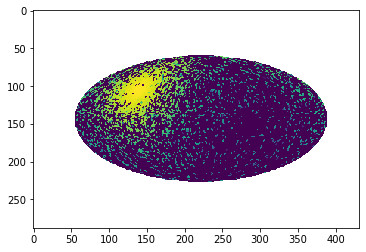

In [92]:
plt.imshow(positron[5])

# build the model

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(388, 612, 4)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Using TensorFlow backend.


ResourceExhaustedError: OOM when allocating tensor with shape[15197184,128] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:RandomUniform]

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6422656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 6,424,266
Trainable params: 6,424,266
Non-trainable params: 0
_________________________________________________________________


# split the set in train set and test set

In [11]:
from sklearn.model_selection import train_test_split
pos_train,pos_test,el_train,el_test=train_test_split(positron,electron,test_size=0.2)

In [12]:
pos_train.shape

(536, 388, 612, 4)

In [13]:
pos_test.shape

(135, 388, 612, 4)

# compile the model and run the training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(pos_train, el_train, batch_size=512, validation_split=0.2, epochs=10)

In [ ]:
model.evaluate(X_test, y_test)